# 신경망의 이해 - 퍼셉트론

## #01. 준비작업

### 1. 패키지 참조하기


In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action="ignore")

from hossam.util import *
from hossam.plot import *

from tensorflow.keras.models import Sequential # 순서층을 구성하는 모델 객체 생성
from tensorflow.keras.layers import Dense # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import SGD, RMSprop # 옵티마이저
from tensorflow.keras.losses import mse # OR게이트에서 사용할 활성화 함수

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## #02. AND 게이트

### [1] 데이터 가져오기

훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 이 예제는 훈련/검증 데이터를 분할하지 않음

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/and.xlsx", info=False)


상위 5개 행
+----+------+------+----------+
|    |   x1 |   x2 |   target |
|----+------+------+----------|
|  0 |    0 |    0 |        0 |
|  1 |    1 |    0 |        0 |
|  2 |    0 |    1 |        0 |
|  3 |    1 |    1 |        1 |
+----+------+------+----------+


### [2] 독립, 종속 변수 분리


In [3]:
x = origin.drop(labels='target', axis=1)
y = origin['target']
rows, cols = x.shape
rows, cols

(4, 2)

### [3] 훈련 모델 적합


In [5]:
model = Sequential()
# 1차원의 데이터를 입력으로 받고, cols개의 출력을 가지며 활성화 함수로 linear를 사용하는 첫 번재 Dense층 
model.add(Dense(1, input_shape=(cols,), activation='linear'))
model.compile(optimizer=SGD(), loss=mse, metrics=['acc'])
model.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

### [4] 학습하기


In [7]:
%%time
result = model.fit(x, y, epochs=500,verbose=0)
result

CPU times: total: 11.6 s
Wall time: 11.1 s


### [5] 학습 결과 

#### (1) 에폭별 정확도(acc)와 손실률(loss)


In [8]:
result_df = DataFrame(data=result.history)
result_df['epochs'] = result_df.index + 1
result_df

,acc,loss,epochs
0,1.0,0.062704,1
1,1.0,0.062702,2
2,1.0,0.062701,3
3,1.0,0.062700,4
4,1.0,0.062698,5
...,...,...,...
495,1.0,0.062508,496
496,1.0,0.062508,497
497,1.0,0.062508,498
498,1.0,0.062508,499


#### (2) 정확도, 손실률 시각화


In [10]:
rdf = result_df.melt(id_vars='epochs', var_name='metric', value_name='value')
rdf

,epochs,metric,value
0,1,acc,1.000000
1,2,acc,1.000000
2,3,acc,1.000000
3,4,acc,1.000000
4,5,acc,1.000000
...,...,...,...
995,496,loss,0.062508
996,497,loss,0.062508
997,498,loss,0.062508
998,499,loss,0.062508


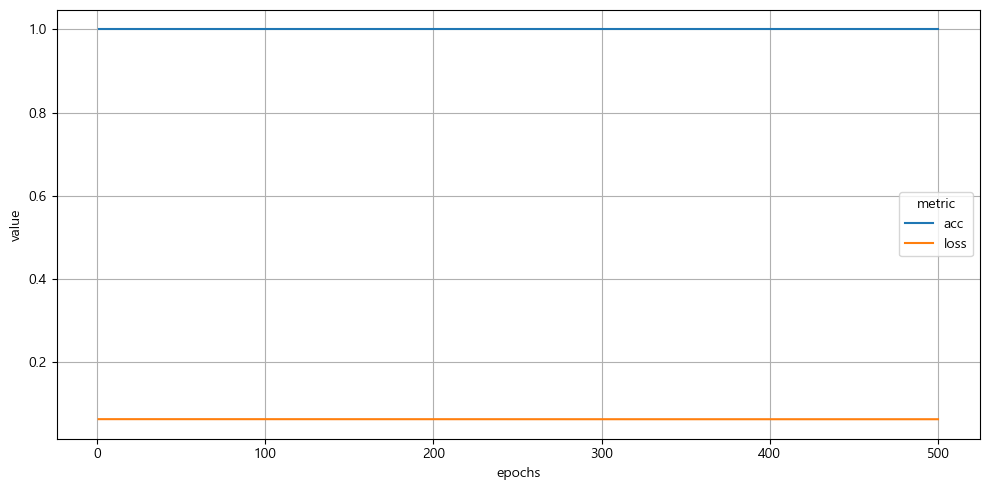

In [11]:
my_lineplot(df=rdf, xname='epochs', yname='value', hue='metric')

### [6] 모델 성능 평가

이 단계에서 검증 데이터를 활용해야 하지만 이 예제는 훈련/검증 데이터를 나누지 않았으므로 훈련데이터로 진행

In [12]:
ev = model.evaluate(x, y)
print('손실률: %0.2f%%, 정확도: %0.2f%%' % (ev[0], ev[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - acc: 1.0000 - loss: 0.0625
손실률: 0.06%, 정확도: 1.00%


### [7] 가중치, 편향 확인


In [13]:
weight, bias = model.get_weights()
print('가중치: %s' % weight)
print('편향: %s' % bias)

가중치: [[0.50437284]
 [0.5032364 ]]
편향: [-0.25451282]


### [8] 학습 결과 적용

#### (1) 단일 데이터에 대한 예측치 산정


In [14]:
for i  in range(0,2):
    for j in range(0, 2):
        r = model.predict(np.array([[i, j]]))
        print('입력: %d, %d => 출력: %0.2f' % (i, j, r[0][0]))
        print('%s AND %s => %s' % (bool(i), bool(j), bool(round(r[0,0]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
입력: 0, 0 => 출력: -0.25
False AND False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
입력: 0, 1 => 출력: 0.25
False AND True => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
입력: 1, 0 => 출력: 0.25
True AND False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
입력: 1, 1 => 출력: 0.75
True AND True => True


#### (2) 학습 데이터 전체를 활용하여 예측값 만들기


In [15]:
r = model.predict(x)
r

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[-0.25451282],
       [ 0.24986002],
       [ 0.2487236 ],
       [ 0.75309646]], dtype=float32)

In [16]:
origin['pred'] = r.reshape(-1).round()
origin

,x1,x2,target,pred
0,0,0,0,-0.0
1,1,0,0,0.0
2,0,1,0,0.0
3,1,1,1,1.0


## #03. OR 게이트

### [1] 데이터 가져오기


In [17]:
origin = my_read_excel("https://data.hossam.kr/mldata/or.xlsx", info=False)


상위 5개 행
+----+------+------+----------+
|    |   x1 |   x2 |   target |
|----+------+------+----------|
|  0 |    0 |    0 |        0 |
|  1 |    1 |    0 |        1 |
|  2 |    0 |    1 |        1 |
|  3 |    1 |    1 |        1 |
+----+------+------+----------+


### [2] 독립, 종속 변수 분리


In [18]:
x = origin.drop(labels='target', axis=1)
y = origin['target']
rows, cols = x.shape
rows, cols

(4, 2)

### [3] 모델 적합


In [19]:
model  = Sequential()
model.add(Dense(1, activation='linear', input_shape=(cols,)))
model.compile(optimizer=SGD(), loss=mse, metrics=['acc'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

### [4] 학습하기


In [20]:
%%time
result = model.fit(x, y, epochs=500, verbose=0)
result

CPU times: total: 11.6 s
Wall time: 11.2 s


### [5] 학습 결과


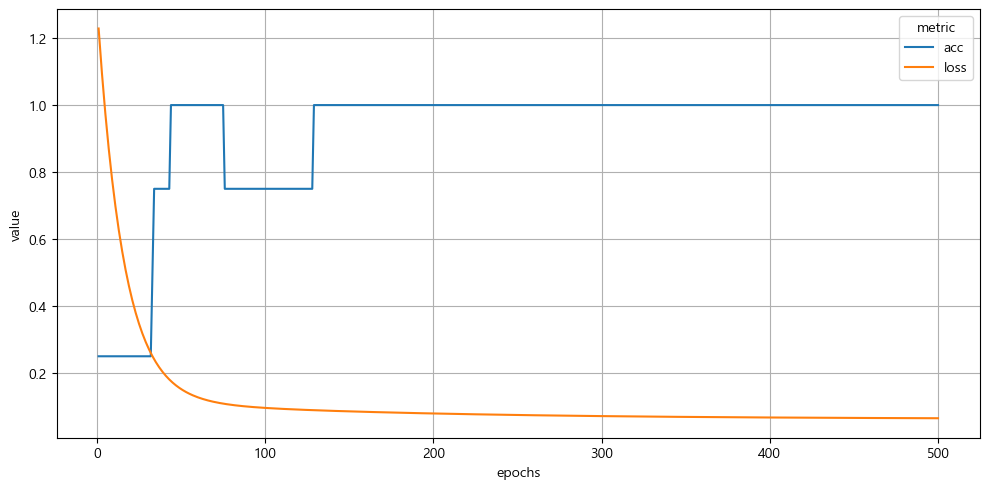

손실률: 0.06, 정확도: 1.00


In [21]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index + 1
rdf = result_df.melt(id_vars='epochs', var_name='metric', value_name='value')

my_lineplot(df=rdf, xname='epochs', yname='value', hue='metric')

ev = model.evaluate(x, y, verbose=0)
print('손실률: %0.2f, 정확도: %0.2f' % (ev[0], ev[1]))

### [6] 가중치, 편향


In [22]:
weight, bias=  model.get_weights()
print("가중치: %s" % weight)
print("편향: %s" % bias)

가중치: [[0.43702507]
 [0.4268806 ]]
편향: [0.33071333]


### [7] 학습 결과 적용

##### 단일 데이터에 대한 예측치 산정


In [23]:
for i in range(0, 2):
    for j in range(0, 2):
        r = model.predict(np.array([[i, j]]))
        print('입력: %d, %d => 출력: %0.2f' % (i, j, r[0][0]))
        print('%s OR %s => %s' % (bool(i), bool(j), bool(round(r[0][0]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
입력: 0, 0 => 출력: 0.33
False OR False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
입력: 0, 1 => 출력: 0.76
False OR True => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
입력: 1, 0 => 출력: 0.77
True OR False => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
입력: 1, 1 => 출력: 1.19
True OR True => True


##### 학습 데이터 전체를 활용하여 예측값 만들기


In [24]:
r = model.predict(x, verbose=0)
origin["pred"] = r.reshape(-1).round()
origin

,x1,x2,target,pred
0,0,0,0,0.0
1,1,0,1,1.0
2,0,1,1,1.0
3,1,1,1,1.0


## #04. XOR 게이트

### [1] 데이터 가져오기


In [25]:
origin = my_read_excel("https://data.hossam.kr/mldata/xor.xlsx", info=False)


상위 5개 행
+----+------+------+----------+
|    |   x1 |   x2 |   target |
|----+------+------+----------|
|  0 |    0 |    0 |        0 |
|  1 |    1 |    0 |        1 |
|  2 |    0 |    1 |        1 |
|  3 |    1 |    1 |        0 |
+----+------+------+----------+


### [2] 독립, 종속 변수 분리


In [26]:
x = origin.drop(labels="target", axis=1)
y = origin["target"]
rows, cols = x.shape
rows, cols

(4, 2)

### [3] 훈련 모델 적합


In [40]:
model = Sequential()
# 층이 2인 경우 --> 정확도 75%
# 층이 4인 경우 --> 정확도 75%
# 층이 8인 경우 --> 정확도 100%
# 층이 16인 경우 --> 정확도 100%
model.add(Dense(8, input_shape=(cols,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss=mse, metrics=['acc'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

### [4] 학습 및 학습 결과 확인


CPU times: total: 0 ns
Wall time: 0 ns


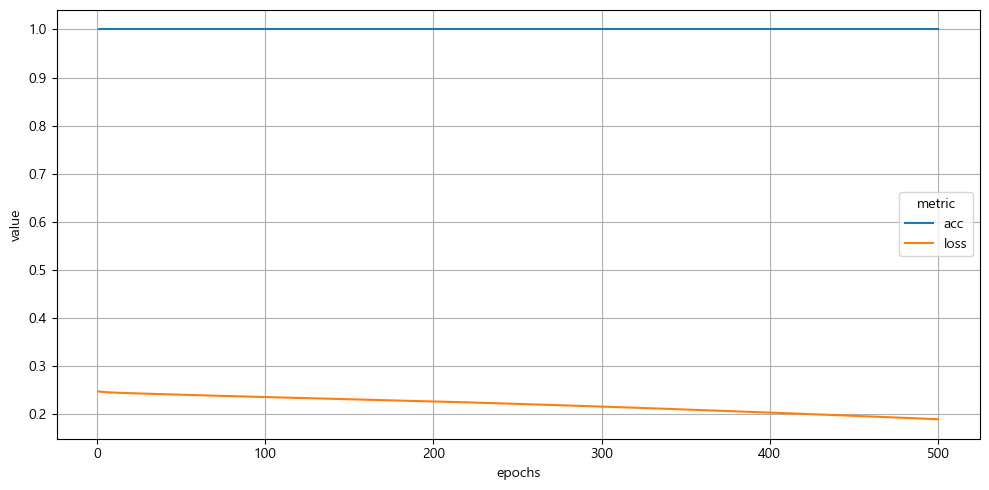

[scatterd] >WARNING> 5 out of the last 5 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x00000226D11BBD80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


손실률: 0.19, 정확도: 1.00


In [41]:
%time
result = model.fit(x, y, epochs=500, verbose=0)

result_df = DataFrame(result.history)
result_df["epochs"] = result_df.index + 1

rdf = result_df.melt(id_vars="epochs", var_name="metric", value_name="value")

my_lineplot(df=rdf, xname="epochs", yname="value", hue="metric")

ev = model.evaluate(x, y, verbose=0)
print("손실률: %0.2f, 정확도: %0.2f" % (ev[0], ev[1]))

### [5] 가중치, 편향


In [42]:
weights = model.get_weights()
weights

[array([[ 0.5484493 ,  0.05589291, -0.3188941 ,  0.40310958,  0.72634834,
         -0.76128286, -0.48423743,  0.21766599],
        [ 0.37120432, -0.04533939, -0.19906598, -0.13546379, -0.7443296 ,
         -0.41525954, -0.160379  ,  0.68629825]], dtype=float32),
 array([-0.37209576,  0.05350795,  0.        ,  0.13594912,  0.00205025,
         0.        ,  0.        ,  0.00225776], dtype=float32),
 array([[-0.89121336],
        [-0.19592524],
        [-0.53600574],
        [-0.38153177],
        [ 0.97129595],
        [-0.2987038 ],
        [ 0.14913666],
        [ 0.63028014]], dtype=float32),
 array([-0.18603784], dtype=float32)]

In [43]:
# 2차원 배열 - 입력층과 은닉층을 연결하는 가중치
print(weights[0].shape)

# 1차원 배열 - 은닉층의 편향
print(weights[1].shape)

# 2차원 배열 - 은닉층과 출력층을 연결하는 가중치
print(weights[2].shape)

# 1차원 배열 - 출력층의 편향
print(weights[3].shape)

(2, 8)
(8,)
(8, 1)
(1,)


### [6] 학습 결과 적용

##### 단일 데이터에 대한 예측치 산정


In [44]:
for i in range(0, 2):
    for j in range(0, 2):
        r = model.predict(np.array([[i, j]]))
        print("입력: %d, %d => 출력: %0.2f" % (i, j, r[0][0]))
        print("%s OR %s => %s" % (bool(i), bool(j), bool(round(r[0, 0]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
입력: 0, 0 => 출력: 0.44
False OR False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
입력: 0, 1 => 출력: 0.56
False OR True => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
입력: 1, 0 => 출력: 0.57
True OR False => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
입력: 1, 1 => 출력: 0.43
True OR True => False


##### 학습 데이터 전체를 활용하여 예측값 만들기


In [45]:
r = model.predict(x, verbose=0)
origin['predict'] = r.reshape(-1).round()
origin

,x1,x2,target,predict
0,0,0,0,0.0
1,1,0,1,1.0
2,0,1,1,1.0
3,1,1,0,0.0
